# League of Legends - Worlds 2023 Swiss Style System Update. What does that mean for the West?

Since 2011, Riot Game have hosted yearly world championships inviting the best teams from many regions around the world. For the 2023 world championship, they have updated their groups stage from 4 groups of 4 teams (where after a double round robin within each group, the top two teams advance) to a Swiss style knockout stage. Here, each team races to achieve 3 set wins before 3 set losses, only fighting against teams with an equivalent scoreline at each step of the way. Since League has never seen such a system at the international level, it is natural to ask what impact this might have for Western teams, as we typically perform better in the volatile best of one double round robin stage of groups. We look to construct a stochastic simulate to investigate what outcomes one can expect from the new tournament system implemented and extrapolate to see what chances the West has at Worlds 2023. To begin with we will need to make some assumptions in order to achieve some kind of model, although first we will need to briefly cover the previous tournament setup.

A disclaimer before we start. The data isn't cleverly scraped, this project isn't perfect and the process not as detailed as it could be. Even-so, I am confident the method used provides a well-made stochastic simulation that meaningfully represents what could happen later this year at Worlds 2023 in October / November. I have done my utmost to outline my assumptions and justify my process below. 

# Overview
## Previous Tournament(s)

The previous structure was as follows. The regions of the world were split into rough two classifications, major and minor regions. Each region would send a number of their best teams as representatives to international tournmanents, where depending on the tournament in question there would be a different structure. Major regions (China, Korea, Europe and North America) typically have their best teams seeded further into international tournament, where as minor regions (Vietnam, South Asia, Oceania, Turkey, Japan, Brazil, Latin America and the Commonweath of Independent States), along with the lower seeds of major regions, must play through some play-in or enterence tournament. League of Legends has 4 primary international events in a year. Worlds (the main international event where a world champion is crowned), the Mid-Seasonal Invitational (A smaller tournament hosted between spring and summer for the winners of the winter/spring tournaments in each region), Asian Games and All-Stars. The All-Stars tournament is an off-season international tournament featuring fan-voted players, and was last seen in 2020, and as such will not be used in the data-set. In addition, the Asian Games include a mix of the best players from various Asian Regions, typically from accross multiple teams. While it is a very serious event with players fighting for national pride that commonly showcases some of the highest eschelons of competative play, both players and coaches lack the potentially years of experience working together, and do not represent the teams that would have had to fight through their regional league to be seeded into Worlds or MSI as a representative. Many smaller regions are included in the Asian Games tourament, such as Hong Kong, Malaysia, Singapore and Thailand, and players who play for one Region may be of a different nationality (and therefore play for their home country's team). Thus, as there are differences in how these teams are constructed, we will also be excluding the Asian Games from our data-set, and therefore will only be considering the Mid-Season Invitational and Worlds as valid observations.

The main issue we face is that as there are different numbers of represenatives from different regions sent to each tournament, observations between the strongest seeds (Korea/China 1st seeds) and the weakest seeds (minor regions who struggle to make it to the main stage) are extremely limited / completely unobserved. As such, our first assumption is that we will be measuring each Regions strength, rather than the seeds of each region (for example we will treat the 3rd seed of Europe the same as their 1st seed). This way, there is some observations of each region in competative play. Further, this helps transition observations between different region systems. Once upon a time, Latin America was split into North and South, and East Asia was split into different subsections. Here, we can simply group each collection of sub-regions into their eventual set.

## Blue-Team advantage and Side Selection

League of Legends has two different teams, Blue and Red, and while the map is mostly symettrical, just like chess, one-side has had a consistant advantage over history. Blue-side has long been considered the stronger team, and is chosen most often over the history of professional play. There have been certain times in leagues history where particular strategies for teams have left Red-side the more attractive option, but these are rare and specific to said teams. Typically the higher seed going into a match gets side selection in the first match (if the match is a best of 3 or 5), or teams will get to play once on both sides (in the double round robin mentioned above). The other way a team will have to choose a side is when they lose a match in a best of 3 or 5. I can't think of a fair way to represent this specific red-side quirk for specific regions in history without having to watch several hundreds of hours of matches, and currently in 2023 there seems to be a strong Blue-side preference over all 4 major regions. I can think of two different ways to tackle this. 
1) We could always have the team with side selection choose blue-side, which will have the better win-odds
2) We could work out some probability of a team choosing Red-Side, and some win-chance of the team IF red-side is chosen

Due to the aformented issues with limited observations between some regions, one can assume that option 2 will cause some issues, although it makes for an interesting extention to this project.

## Data and League History

As implyed above, League of Legends has had many different strategies and competitive structures over it's more than a decade as an international e-sport. What is considered the first Worlds tournement was won by Europe, although only 8 teams from North America, Europe and what was at the time South East Asia competed. Korea and China would enter for the Second season, although consistant level of dominance wasn't nearly as uniform as it would be in future seasons.  in 2016 the International Wild-Card Tournement would see its last showing before the formal Play-In tournement would become a part of the formal structure for Worlds. It is clear that some cut-off for the original seasons of League's history is required, as many of the instituations that now support teams in each region did not exist in the early years. I have chosen 2014 as the cut-off, so only data from season 5 (2015) and later will be considered. The precise cut-off does not have much justification, and there is an arguement for formal analysis to see if there is a significant difference in the win-rates of different teams around these years, however there is a lot of expert knowledge that would need to be provided to justify a specific cut-off date, and as a rough estimate of a date 2015 seems satisfactory.

Further, for the 2023 season, certain minor Regions were removed. Turkey was incorperated into Europe, forming EMEA (Europe, Middle-East and Africa), and Oceana was incorperated into the Pacific Champtionship (South-East Asia), although some of their players were absorbed by North America. As such, while we have data about these regions and how they performed, we won't be needing them for the simulation (although they are used in calcualting the average win-rate of each side).

On the topic of Regions, the Regions for League are commonly refered to in the acronym for the Championship the Region hosts. A rough guide of the current Regions primarily for non-league enjoyers follows:

Major Regions:
* Korea = LCK
* China = LPL
* Europe = LEC
* North America = LCS

Minor Regions:
* South-East Asia = PCS
* Vietnam = VCS
* Brazil = CBLOL
* Japan = LJL
* Latin America = LLA

where historicly active regions that are no-longer either:

* Oceania = OPL
* Turkey = TCL
* Commonweath of Independent States = CIS

The question is what to do with Oceania and Turkey? We can either re-classify their previous teams as they would appear in their new region, or we can remove them. Turkey is now a Teir two region inside the LEC and as such none of teir teams will be representing the LEC at Worlds. Further, while there was some chance of an Oceanian team to represent the PCS at Worlds, the best performing Oceanian team placed 7/8th, which implies the quality of Oceanian teams does not suitably represent the PCS, and as such both Regions should be excluded beyond calculating historic Blue-side advantage for our prior.

## Assumptions

* Regions have the same chance of winning regardless of the seed of the team (see above)
* The side of each team has a unique win-rate against each other region
* The team with side selection will choose their best side vs that region
* The Prior chosen for each distribution will be the Global win-rate for Blue/Red side before we observe any Region Specifics
* Matches between 2015-2023 will be used, and that data further back doesn't well represent the current state of League of Legends.

## Outline
The plan is as follows.
1) The first step is to collect the game record of every MSI and Worlds since 2015. Store how many games each region won and against whom.
2) Construct a prior distribution for the chance each side has to win before observing each Regions data. This will be average historical win-rates of each team.
3) Construct a Beta-Binomial distribution for the probability of each Region winning on blue-side against every other Region.
4) Simulate the new Swiss Structure at worlds, sampling from each probability distribution based on who is playing.
5) Repeat the simulation a substantual amount of times, observe how the West performs. How many times do we make it to the finals, etc.

# Libraries + Data

In [51]:
from collections import namedtuple
try:
    import random as rnd
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
except:
    import pip
    pip.main(['install', 'numpy'])
    pip.main(['install', 'pandas'])
    pip.main(['install', 'matplotlib'])
    pip.main(['install', 'seaborn'])
    
data_matchtable_long = pd.read_csv("Match Results DataTable.csv")

## Data Wrangling because oopsies (Feel Free to Skip)

Load in data csv and pivot based on region. We need this to calculate observed win percentage for our posterior distribution. Let's first see how many games each Region has won vs each other Region on Blue and Red sides respectively. Let's load the data and test a quick pivot.

In [52]:
data_matchtable_long

,BLUE REGION,BLUE SEED,BLUE TEAM,BLUE SCORE,RED SCORE,RED TEAM,RED SEED,RED REGION
0,CH,CH,⁠Bilibili Gaming,0,1,JD Gaming,CH,CH
1,CH,CH,JD Gaming,1,0,⁠Bilibili Gaming,CH,CH
2,CH,CH,⁠Bilibili Gaming,1,0,JD Gaming,CH,CH
3,CH,CH,JD Gaming,1,0,⁠Bilibili Gaming,CH,CH
4,CH,CH,⁠Bilibili Gaming,1,0,T1,KR,KR
...,...,...,...,...,...,...,...,...
1194,VT,VT,Bangkok Titans,1,0,Chiefs Esports Club,OC,OC
1195,JP,JP,DetonatioN FocusMe,0,1,Besiktas E-Sports Club,TK,TK
1196,VT,VT,Bangkok Titans,0,3,Besiktas E-Sports Club,TK,TK
1197,CI,CI,Hard Random,1,3,INTZ eSports,BR,BR


There are a total of 1200 matchs, although some are single, some a best of 3 or 5, and some best of series are split into their individual games. Let's see how many games each side wins over-time. That will give us the total number of matches played (for every game Red wins, Blue loses and vica verse).

In [53]:
prior_blue_win_chance = data_matchtable_long['BLUE SCORE'].sum()/(data_matchtable_long['BLUE SCORE'].sum()+data_matchtable_long['RED SCORE'].sum())
prior_red_win_chance = data_matchtable_long['RED SCORE'].sum()/(data_matchtable_long['BLUE SCORE'].sum()+data_matchtable_long['RED SCORE'].sum())
print('Blue Wins: ' + str(data_matchtable_long['BLUE SCORE'].sum()) + ', Win % = ' + str(np.round(prior_blue_win_chance,4)))
print('Red Wins: ' + str(data_matchtable_long['RED SCORE'].sum()) + ', Win % = ' + str(np.round(prior_red_win_chance,4)))
print('Total Games Played: ' + str(data_matchtable_long['BLUE SCORE'].sum()+data_matchtable_long['RED SCORE'].sum()))

Blue Wins: 863, Win % = 0.5604
Red Wins: 677, Win % = 0.4396
Total Games Played: 1540


Excellent. This supports the belief ~~prior~~ historically held by the community that Blue-side is advantaged, although only slightly. Let's Pivot the table and get our Odds by Region.

In [54]:
data_blue_wincount_pivot = data_matchtable_long.pivot_table(index='BLUE REGION', columns='RED REGION', values='BLUE SCORE',
                                                             aggfunc="sum", margins=True, fill_value=0)
data_blue_wincount_pivot

RED REGION,BR,CH,CI,EU,JP,KR,LA,OC,SA,TK,VT,All
BLUE REGION,,,,,,,,,,,,
BR,0,1,2,1,8,0,7,3,3,8,2,35
CH,2,14,4,41,5,35,6,5,24,5,11,152
CI,8,1,0,3,2,1,8,3,3,4,1,34
EU,6,23,4,2,1,12,5,3,17,5,8,86
JP,3,0,0,0,0,0,3,5,2,0,2,15
KR,2,45,3,49,3,28,3,1,18,3,10,165
LA,1,1,8,0,4,0,1,2,2,1,3,23
OC,10,0,2,0,4,0,5,0,0,2,3,26
SA,6,3,10,9,3,8,6,1,1,10,5,62


 ! Only 663 wins on Blue are recorded in total. Clearly there is some issue with the method used to pivot the data with Pandas. Setting dropna = False, as see we have times where there are NA enteries.

In [55]:
data_blue_wincount_pivot = data_matchtable_long.pivot_table(index='BLUE REGION', columns='RED REGION', values='BLUE SCORE',
                                                             aggfunc="sum", margins=True, fill_value=0, dropna=False)
data_blue_wincount_pivot


RED REGION,BR,CH,CI,EU,JP,KR,LA,OC,SA,TK,VT,All
BLUE REGION,,,,,,,,,,,,
BR,0,1,2,1,8,0,7,3,3,8,2,37
CH,2,14,4,41,5,35,6,5,24,5,11,182
CI,8,1,0,3,2,1,8,3,3,4,1,36
EU,6,23,4,2,1,12,5,3,17,5,8,112
JP,3,0,0,0,0,0,3,5,2,0,2,18
KR,2,45,3,49,3,28,3,1,18,3,10,198
LA,1,1,8,0,4,0,1,2,2,1,3,23
OC,10,0,2,0,4,0,5,0,0,2,3,27
SA,6,3,10,9,3,8,6,1,1,10,5,69


BUT WHY? Let's have a look.

In [56]:
data_matchtable_long[data_matchtable_long.isna().any(axis=1)]

,BLUE REGION,BLUE SEED,BLUE TEAM,BLUE SCORE,RED SCORE,RED TEAM,RED SEED,RED REGION
16,NaN,NaN,Cloud9,0,1,Gen.G eSports,KR,KR
17,NaN,NaN,Cloud9,0,1,Gen.G eSports,KR,KR
18,KR,KR,Gen.G eSports,1,0,Cloud9,NaN,NaN
23,NaN,NaN,Cloud9,1,0,⁠Golden Guardians,NaN,NaN
24,NaN,NaN,Cloud9,0,1,⁠Golden Guardians,NaN,NaN
...,...,...,...,...,...,...,...,...
1162,NaN,NaN,Team SoloMid,0,1,Edward Gaming,CH,CH
1165,NaN,NaN,Team SoloMid,0,1,AHQ E-Sports Club,SA,SA
1167,KR,KR,SKTelecom T1,1,0,Team SoloMid,NaN,NaN
1171,TK,TK,Besiktas E-Sports Club,0,1,Team SoloMid,NaN,NaN


We can see all the North American teams, likely having the Tag of NA, have been regestered as NaN. A look at the csv confirms this. OOPS! Let's try this again.

# Fixed Win Counts and Correct Names
Reload libraries encase anyone skipped the first bit, and start up a generator for np random samples later down the line. We set up the prior blue win chance and take a look at the overall Wins and Games played, and update the names of ALL Regions so our data is more appealing to a League consumer.

In [57]:
# Set Generator For Lator
rng = np.random.default_rng(101)
print(rng)
data_matchtable_long = pd.read_csv("Match Results DataTable.csv").fillna('USA')
# Re-Name all the Regions to the actual League Name
data_region_pairs = [['KR', 'LCK'],
['CH', 'LPL'],
['EU', 'LEC'],
['USA', 'LCS'],
['SA', 'PCS'],
['VT', 'VCS'],
['BR', 'CBL'],
['JP', 'LJL'],
['LA', 'LLA'],
['OC', 'OPL'],
['TK', 'TCL'],
['CI','CIS']]
for pair in data_region_pairs:
    for column_name in data_matchtable_long.columns:
        data_matchtable_long.loc[data_matchtable_long[column_name] == pair[0],column_name] = pair[1]
# Find the Simple Observed averaged win rate of both sides
prior_blue_win_chance = data_matchtable_long['BLUE SCORE'].sum()/(data_matchtable_long['BLUE SCORE'].sum()+data_matchtable_long['RED SCORE'].sum())
prior_red_win_chance = data_matchtable_long['RED SCORE'].sum()/(data_matchtable_long['BLUE SCORE'].sum()+data_matchtable_long['RED SCORE'].sum())
print('Blue Wins: ' + str(data_matchtable_long['BLUE SCORE'].sum()) + ', Win % = ' + str(np.round(prior_blue_win_chance,4)))
print('Red Wins: ' + str(data_matchtable_long['RED SCORE'].sum()) + ', Win % = ' + str(np.round(prior_red_win_chance,4)))
print('Total Games Played: ' + str(data_matchtable_long['BLUE SCORE'].sum()+data_matchtable_long['RED SCORE'].sum()))
data_matchtable_long

Generator(PCG64)
Blue Wins: 863, Win % = 0.5604
Red Wins: 677, Win % = 0.4396
Total Games Played: 1540


,BLUE REGION,BLUE SEED,BLUE TEAM,BLUE SCORE,RED SCORE,RED TEAM,RED SEED,RED REGION
0,LPL,LPL,⁠Bilibili Gaming,0,1,JD Gaming,LPL,LPL
1,LPL,LPL,JD Gaming,1,0,⁠Bilibili Gaming,LPL,LPL
2,LPL,LPL,⁠Bilibili Gaming,1,0,JD Gaming,LPL,LPL
3,LPL,LPL,JD Gaming,1,0,⁠Bilibili Gaming,LPL,LPL
4,LPL,LPL,⁠Bilibili Gaming,1,0,T1,LCK,LCK
...,...,...,...,...,...,...,...,...
1194,VCS,VCS,Bangkok Titans,1,0,Chiefs Esports Club,OPL,OPL
1195,LJL,LJL,DetonatioN FocusMe,0,1,Besiktas E-Sports Club,TCL,TCL
1196,VCS,VCS,Bangkok Titans,0,3,Besiktas E-Sports Club,TCL,TCL
1197,CIS,CIS,Hard Random,1,3,INTZ eSports,CBL,CBL


Now with our North American (NA) values correctly loaded in LCS, we see that the total games match, and can therefore begin using this information to construct observed win percentages. First step, now we have our historic win-rate for Blue-side, we can remove Regions that no longer have representatives at Worlds, and pivot the data to calculate the number of wins each Region has.

In [58]:
data_remove_regions = ['OPL', 'TCL','CIS']
for region in data_remove_regions:
    for side in ['BLUE REGION','RED REGION']:
        data_matchtable_long = data_matchtable_long.drop(data_matchtable_long[data_matchtable_long[side]==region].index)
data_blue_wincount_pivot = data_matchtable_long.pivot_table(index='BLUE REGION', columns='RED REGION', values='BLUE SCORE',
                                                             aggfunc="sum", fill_value=0)
data_matchtable_long.pivot_table(index='BLUE REGION', columns='RED REGION', values='BLUE SCORE',
                                                             aggfunc="sum", margins=True, fill_value=0)

RED REGION,CBL,LCK,LCS,LEC,LJL,LLA,LPL,PCS,VCS,All
BLUE REGION,,,,,,,,,,
CBL,0,0,2,1,8,7,1,3,2,24
LCK,2,28,33,49,3,3,45,18,10,191
LCS,4,8,2,16,4,6,9,17,10,76
LEC,6,12,26,2,1,5,23,17,8,100
LJL,3,0,3,0,0,3,0,2,2,13
LLA,1,0,0,0,4,1,1,2,3,12
LPL,2,35,30,41,5,6,14,24,11,168
PCS,6,8,7,9,3,6,3,1,5,48
VCS,0,1,1,2,2,6,2,2,0,16


In [59]:
data_red_wincount_pivot = data_matchtable_long.pivot_table(index='RED REGION', columns='BLUE REGION', values='RED SCORE',
                                                             aggfunc="sum", fill_value=0)
data_matchtable_long.pivot_table(index='RED REGION', columns='BLUE REGION', values='RED SCORE',
                                                             aggfunc="sum", margins=True, fill_value=0)

BLUE REGION,CBL,LCK,LCS,LEC,LJL,LLA,LPL,PCS,VCS,All
RED REGION,,,,,,,,,,
CBL,0,0,0,0,4,3,0,0,1,8
LCK,3,26,27,33,3,3,35,16,12,158
LCS,3,3,2,9,3,1,14,14,5,54
LEC,2,24,13,1,1,3,16,16,9,85
LJL,4,0,0,1,0,3,1,2,0,11
LLA,0,0,0,1,2,5,1,2,3,14
LPL,2,32,22,28,5,4,10,18,5,126
PCS,4,4,8,6,2,1,5,1,6,37
VCS,0,0,4,7,3,7,0,3,0,24


# Constructing Region Win Probabilities

As we can see from the data, there are some Regions which have NEVER won a match against another region. Obviously they have *some* chance, even if the data we have observed doesn't include a win. As-such, we're going to take a Bayesian approach and look to construct a posterior distribution for the probability a Region wins on blue. Firstly, it will be interesting to see what the 95% credible intervals are for the Win Chance each Region has, and secondly we can take the Maximum Posterior estimate probabilities as win-chance for our simulation of the Swiss Stage. This will form a Win Probability matrix $\boldsymbol{\omega}$ that we will sample from when simulating matches between Regions later on.

First we must consider what our statistical model will be. We could either model each game following the Bernoulli distribution, as whether a team wins or loses is a simple binary outcome, or we could model full matches following the Binomial Distirbution, as each match is a set binary outcomes. There is a little difference in how we might approach either method, but since the Bernoulli distribution is a special case of the Binomial distribution, and therefore the Beta distribution can be used as a conjugate for both, there is minimal practical difference from a statistical point of view (as long as any side selection assumption is valid). Hence, as within each match there is an initially unknown amount of games (a best of 5 might end after 3 games if one team wins all 3), and that whoever wins each game determins side selection (and therefore the probability each team wins each match), it will be much simpler we take the first approach. Therefore we look to model each game individually. We assume that the probability a Region $i$ wins a given match on the Blue team when against another Region $j$ is assumed to follow a Bernoulli distribution $$\omega_{i,j} \sim Bern(p_{i,j}).$$

Second, we're going to construct our prior distribution for the chance any Region wins on Blue. We know that the win rate Blue is roughly 56%, and that this is going to depend a lot on the quality of the team more-so than this prior information. Therefore, we want a relatively flat Beta distribition with an expected value $E[X] = 0.56$. The pdf of the Beta distribution is given by $$f(x;a,b) = \frac{x^{a-1}(1-x)^{b-1}}{\Beta(a,b)},$$ with an expected value of the Beta distribution is given by
$E[x] = \frac{a}{a+b}$.
As a $Beta(1,1)$ is a Uniform distribution over $[0,1]$, and a $Beta(2,2)$ is a parabola centred on 0.5, we choose a prior disribution of $Beta(1.4,1.1)$


Text(0.5, 1.0, 'Example Likelihood Density of Beta(1.4,1.1), Sample Mean = 0.56')

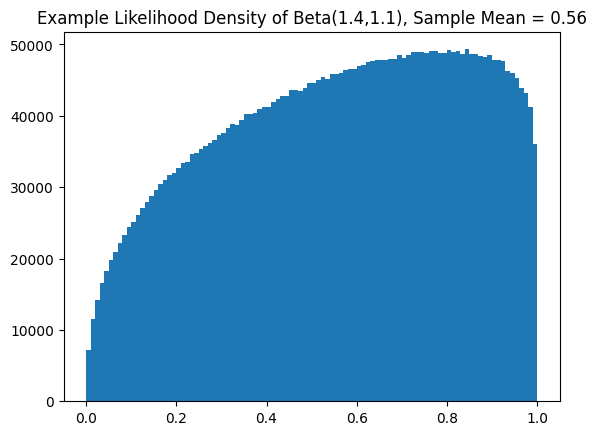

In [60]:
hyperprior_a = np.round(2.5*0.56,4)
hyperprior_b = np.round(2.5*0.44,4)
example_beta = rng.beta(a=hyperprior_a,b=hyperprior_b,size=4000000)
plt.hist(np.sort(example_beta),bins=100)
plt.title('Example Likelihood Density of Beta('+str(hyperprior_a)+','+str(hyperprior_b)+'), Sample Mean = ' + str(np.round(np.mean(example_beta),4)))

Now we need our observed games. We need both observed won and total games played from the Blue team. We know how many games each Region has won from both the Blue and Red sides, and therefore, we can calculate the total number of games. For example let's take EU. The number of games EU has played against USA is the number of games EU has won on Blue vs USA plus the number of games USA has won vs EU on Red. We can confirm if our code is correct by checking if the Regions Win probabilities sum to 1 against each other $(\text{p Region 1 win blue } = \text{ p Region 2 lose red}).$ Therefore:

In [61]:
data_blue_total = data_blue_wincount_pivot+data_red_wincount_pivot.T
data_red_total = data_red_wincount_pivot+data_blue_wincount_pivot.T
data_blue_wincount_pivot/data_blue_total
# Check the total sums to 1:
#data_blue_wincount_pivot/data_blue_total + (data_red_wincount_pivot/data_red_total).T

RED REGION,CBL,LCK,LCS,LEC,LJL,LLA,LPL,PCS,VCS
BLUE REGION,,,,,,,,,
CBL,NaN,0.000000,0.400000,0.333333,0.666667,1.000000,0.333333,0.428571,1.000000
LCK,1.000000,0.518519,0.916667,0.671233,1.000000,1.000000,0.584416,0.818182,1.000000
LCS,1.000000,0.228571,0.500000,0.551724,1.000000,1.000000,0.290323,0.680000,0.714286
LEC,1.000000,0.266667,0.742857,0.666667,0.500000,0.833333,0.450980,0.739130,0.533333
LJL,0.428571,0.000000,0.500000,0.000000,NaN,0.600000,0.000000,0.500000,0.400000
LLA,0.250000,0.000000,0.000000,0.000000,0.571429,0.166667,0.200000,0.666667,0.300000
LPL,1.000000,0.500000,0.681818,0.719298,0.833333,0.857143,0.583333,0.827586,1.000000
PCS,1.000000,0.333333,0.333333,0.360000,0.600000,0.750000,0.142857,0.500000,0.625000
VCS,0.000000,0.076923,0.166667,0.181818,1.000000,0.666667,0.285714,0.250000,NaN


Hence, for $w$ won games, and $n$ total games, we calculate our Posterior Distribution given by: $$\omega | \text{data} \sim \Beta(a+w,b+n-w),$$ which has an expected value $$E[\omega] = \frac{a+w}{a+b+n}.$$ As we can see, the regions that have never played against themselves recieve the prior expected probability of 0.56 to win on Blue, and those with 100% win-rate historically have varyingly high probabilities of winning depending on the strength of the data we have observed. Below is the Posterior Probability table of the Blue Side win chance acrross each Region pair.

We can see the dark void that occurs when any Region other than the Korea (LCK) or China (LPL) fights the LCK, with a similar although significantly less apparent dominance from the LPL. It's hard to identify visually a weakest Minor Region, and although Latin America (LLA) has consistantly low odds, they do not sport the same extreme loss probabilites that are observed by Japan (LJL), South-East Asia (PCS) and Vietnam (VSC).


Text(0.5, 0.98, 'Posterior Probability of Victory for the Blue Region, \n LCK and LPL dominance on Display.')

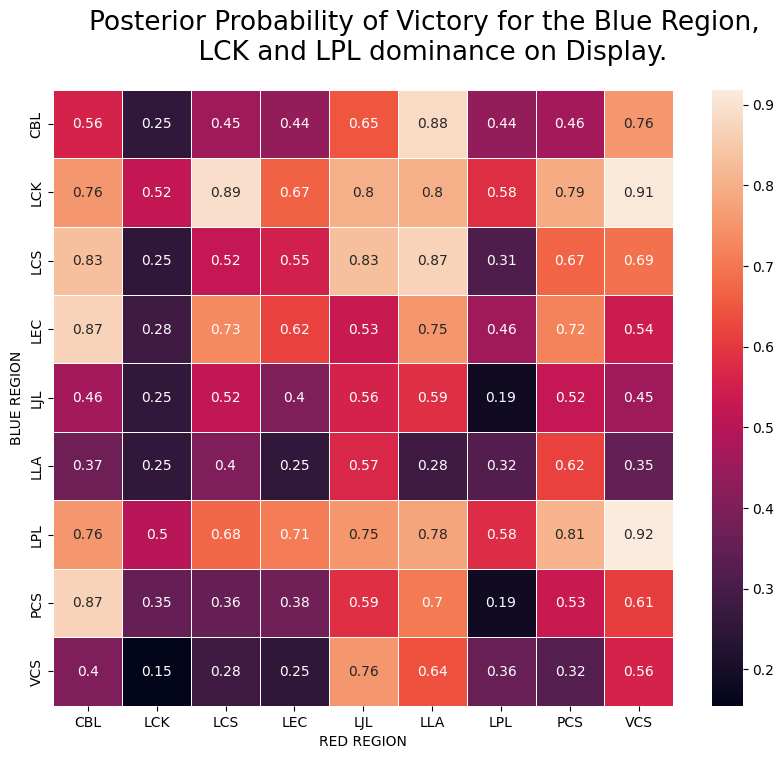

In [62]:
data_posterior_blue_win = (hyperprior_a + data_blue_wincount_pivot) / (hyperprior_a + hyperprior_b + data_blue_total)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data_posterior_blue_win,annot=True,linewidths=0.5)
fig.suptitle("Posterior Probability of Victory for the Blue Region, \n LCK and LPL dominance on Display.",size=19)
#data_posterior_blue_win

## Prefered Side = Calculate the Best side for each Region.

Now we have each teams Posterior Win-Rate on Blue, we can work out what side they should choose if given the choice. Simply their blue win odds vs 1 - their opponents blue lose odds. We can see certain pairs of opponents who have particularly good win-rates against each other on Red-Side, and so would be suited to choosing Red over Blue to have better chances of winning.

In [63]:
data_posterior_choose_blue = (data_posterior_blue_win>1-data_posterior_blue_win.T)*1
data_posterior_choose_blue

RED REGION,CBL,LCK,LCS,LEC,LJL,LLA,LPL,PCS,VCS
BLUE REGION,,,,,,,,,
CBL,1,1,1,1,1,1,1,1,1
LCK,1,1,1,0,1,1,1,1,1
LCS,1,1,1,1,1,1,0,1,0
LEC,1,0,1,1,0,1,1,1,0
LJL,1,1,1,0,1,1,0,1,1
LLA,1,1,1,1,1,0,1,1,0
LPL,1,1,0,1,0,1,1,0,1
PCS,1,1,1,1,1,1,0,1,0
VCS,1,1,0,0,1,0,1,0,1


# Simulation Construction
Now while we have our estimated chance of a Region winning in a single game vs any other Region, that is not all that matters. Multiple best of 5 matches must be won in order to win a Worlds Championship. Our Simulation must consist of:

1) Build Match and Sample function - Winner of Match and Side Selection
2) Work out how to remove teams
3) Construct the tournament bracket

Once we have the Teams set up, PlayIns, Swiss and Knockouts working in a isolated set, we can build them into a function each and cycle through. We can track where teams are knocked out as losing teams absolutely won't be called up again.


## Team Set-Up
We need some data structure for each team. We need to carry the name of the team and the Region it represents. Further, we need some kind match data structure to track scores, side selection and overall results. We're going to use Named Tuples to store each team, and match results. In the future, as we know who is competing at Worlds 2023 (as of Sep 11th 2023 we know all but the LCS/LEC Grudge Match), we can create all the teams that will make their apperiance later in the year for the simluation.

In [64]:
# SetUp Many Many named tuples to carry data forwards in the loops
SetupTeam = namedtuple('Team', ['Region','Seed','Name'])
SetupTeamInMatch = namedtuple('TIM', ['TeamTuple','Score'])
SetupMatch = namedtuple('Game', ['Teams', 'Score', 'Winner', 'Loser'])

# PRINT output for example and testing in early stages!

# All 23 Teams (LEC4 and LCS4 must play in a qualifying series):
# MAJOR:
# LCK
LCK1 = SetupTeam(Region='LCK',Seed=1,Name='Gen.G')
LCK2 = SetupTeam(Region='LCK',Seed=2,Name='T1')
LCK3 = SetupTeam(Region='LCK',Seed=3,Name='KT Rolster')
LCK4 = SetupTeam(Region='LCK',Seed=4,Name='Dplus KIA')

#LPL
LPL1 = SetupTeam(Region='LPL',Seed=1,Name='JDG')
LPL2 = SetupTeam(Region='LPL',Seed=2,Name='BiliBili')
LPL3 = SetupTeam(Region='LPL',Seed=3,Name='LNG')
LPL4 = SetupTeam(Region='LPL',Seed=4,Name='Weibo')

#EMEA
LEC1 = SetupTeam(Region='LEC',Seed=1,Name='G2')
LEC2 = SetupTeam(Region='LEC',Seed=2,Name='Fnatic')
LEC3 = SetupTeam(Region='LEC',Seed=3,Name='MAD Lions')

#USA
LCS1 = SetupTeam(Region='LCS',Seed=1,Name='NRG')
LCS2 = SetupTeam(Region='LCS',Seed=2,Name='Cloud9')
LCS3 = SetupTeam(Region='LCS',Seed=3,Name='Team Liquid')

# MINOR:

#WQS (Grudge Match):
LEC4 = SetupTeam(Region='LEC',Seed=4,Name='BDS')
LCS4 = SetupTeam(Region='LCS',Seed=4,Name='GG')

#PCS
PCS1 = SetupTeam(Region='PCS',Seed=1,Name='PSG Talon')
PCS2 = SetupTeam(Region='PCS',Seed=2,Name='CTBC Flying Oyster') #What a goated name on god

#VCS
VCS1 = SetupTeam(Region='VCS',Seed=1,Name='GAM')
VCS2 = SetupTeam(Region='VCS',Seed=2,Name='Team Whales')

#LJL
LJL1 = SetupTeam(Region='LJL',Seed=1,Name='DetonatioN FocusMe')
#CBLOL
CBL1 = SetupTeam(Region='CBL',Seed=1,Name='LOUD')
#LLA
LLA1 = SetupTeam(Region='LLA',Seed=1,Name='Movistar R7')

## Single Game, Side Selection, Bo1, Bo3 and Bo5 Functions

Make named tuple for Winner/Loser of a Match. This tells us who gets side selection. So long as we carry scoreline with the team info, it doesnt matter who gets assigned Win/Los at each step. Let's bring a print variable to be able to print the events to check the side selection logic is logic-ing, then use the print function to test a couple of best of 5's. We (should hopefully be able to see as I've not tested this on whatever seed ima pick - tho I'm thinking 101 just because that's lol) can see that the probability is working fine as the expected heavy favourites in Korea win most of their test matches. We set the condition for Team1 having side selection as >0.5 to futureproof the need to have coinflips for who gets to choose.

In [65]:
# REFERENCE LOOKS LIKE ---> data_posterior_blue_win[RED REGION][BLUE REGION]

def SideSelection(TeamChoosing,Opponent,prnt=False): 
    # WAY simpler way is to return the teams in the order they choose to play
    # Means we need Match Team Tuples to Carry Score aswell
    if data_posterior_choose_blue[Opponent.TeamTuple.Region][TeamChoosing.TeamTuple.Region] == 1: #DO THEY DESIRE THE BLUE?
        if prnt==True:
            print(str(TeamChoosing.TeamTuple.Name) + ' chooses Blue')
        return [TeamChoosing,Opponent]
    else:
        if prnt==True:
            print(str(TeamChoosing.TeamTuple.Name) + ' chooses Red')
        return [Opponent,TeamChoosing]

def PlayGame(BlueTIM,RedTIM,prnt=False):
    # ALWAYS return winner in position 0 -> that way we KNOW unless the loop ends that position 1 gets side selection!
    if rng.uniform() < data_posterior_blue_win[RedTIM.TeamTuple.Region][BlueTIM.TeamTuple.Region]:
        BlueTIM = SetupTeamInMatch(TeamTuple=BlueTIM.TeamTuple, Score=BlueTIM.Score + 1)
        if prnt==True:
            print(str(BlueTIM.TeamTuple.Name) + ' : ' + str(BlueTIM.Score) + '   |   ' + str(RedTIM.TeamTuple.Name) + ' : ' + str(RedTIM.Score))
        return([BlueTIM,RedTIM])
    else:
        RedTIM = SetupTeamInMatch(TeamTuple=RedTIM.TeamTuple, Score=RedTIM.Score + 1)
        if prnt==True:
            print(str(BlueTIM.TeamTuple.Name) + ' : ' + str(BlueTIM.Score) + '   |   ' + str(RedTIM.TeamTuple.Name) + ' : ' + str(RedTIM.Score))
        return([RedTIM,BlueTIM])


def Bo5(Team1, Team2, Team1SideSlection=1, prnt=False):
    # Set Up Named Tuple to carry Score with the Team
    # The losing team gets side selection, so if Team1SideSelection is True, then they need to start of "losing"
    if prnt==True:
        print('Bo5: ' + str(Team1.Name) + ' vs ' + str(Team2.Name))
    if Team1SideSlection>0.5:
        TIMlos = SetupTeamInMatch(TeamTuple=Team1, Score=0)
        TIMwin = SetupTeamInMatch(TeamTuple=Team2, Score=0)
    else:
        TIMwin = SetupTeamInMatch(TeamTuple=Team1, Score=0)
        TIMlos = SetupTeamInMatch(TeamTuple=Team2, Score=0)
    while np.max((TIMwin.Score,TIMlos.Score))<3:
        # Now we Play game with the Play Game list that holds the Blue/Red side info in positioning
        MatchList =SideSelection(TIMlos,TIMwin,prnt)
        TIMwin,TIMlos = PlayGame(BlueTIM=MatchList[0],RedTIM=MatchList[1],prnt=prnt) #Now Loser is in position zero
    if prnt==True:
        print(str(TIMwin.TeamTuple.Name) + ' Wins!')
    return(TIMwin,TIMlos)

def Bo3(Team1, Team2, Team1SideSlection=1, prnt=False):
    # Set Up Named Tuple to carry Score with the Team
    # The losing team gets side selection, so if Team1SideSelection is True, then they need to start of "losing"
    if prnt==True:
        print('Bo3: ' + str(Team1.Name) + ' vs ' + str(Team2.Name))
    if Team1SideSlection>0.5:
        TIMlos = SetupTeamInMatch(TeamTuple=Team1, Score=0)
        TIMwin = SetupTeamInMatch(TeamTuple=Team2, Score=0)
    else:
        TIMwin = SetupTeamInMatch(TeamTuple=Team1, Score=0)
        TIMlos = SetupTeamInMatch(TeamTuple=Team2, Score=0)
    while np.max((TIMwin.Score,TIMlos.Score))<2:
        # Now we Play game with the Play Game list that holds the Blue/Red side info in positioning
        MatchList =SideSelection(TIMlos,TIMwin,prnt)
        TIMwin,TIMlos = PlayGame(BlueTIM=MatchList[0],RedTIM=MatchList[1],prnt=prnt) #Now Loser is in position zero
    if prnt==True:
        print(str(TIMwin.TeamTuple.Name) + ' Wins!')
    return(TIMwin,TIMlos)


def Bo1(Team1, Team2, Team1SideSlection=1, prnt=False):
    # Set Up Named Tuple to carry Score with the Team
    if prnt==True:
        print('Bo1: ' + str(Team1.Name) + ' vs ' + str(Team2.Name))
    TIMwin = SetupTeamInMatch(TeamTuple=Team1, Score=0)
    TIMlos = SetupTeamInMatch(TeamTuple=Team2, Score=0)
    if Team1SideSlection>0.5:
        MatchList = SideSelection(TIMwin,TIMlos,prnt)
    else:
        MatchList = SideSelection(TIMlos,TIMwin,prnt)
    # Now we Play game with the Play Game list that holds the Blue/Red side info in positioning
    TIMwin,TIMlos = PlayGame(BlueTIM=MatchList[0],RedTIM=MatchList[1],prnt=prnt) #Now Loser is in position zero
    if prnt==True:
        print(str(TIMwin.TeamTuple.Name) + ' Wins!')
    return(TIMwin,TIMlos)

#-------------------------------------------------#
# Korea Heavy Favs - CHECK if the probability is working correctly. LCK should win 80% of the games here.
Bo5(LCK1, LJL1, Team1SideSlection=1, prnt=True)
Bo5(LCK2, LLA1, Team1SideSlection=1, prnt=True)
Bo5(LCK3, CBL1, Team1SideSlection=1, prnt=True)
Bo5(LCK4, PCS1, Team1SideSlection=1, prnt=True)

Bo5: Gen.G vs DetonatioN FocusMe
Gen.G chooses Blue
Gen.G : 0   |   DetonatioN FocusMe : 1
Gen.G chooses Blue
Gen.G : 1   |   DetonatioN FocusMe : 1
DetonatioN FocusMe chooses Blue
DetonatioN FocusMe : 2   |   Gen.G : 1
Gen.G chooses Blue
Gen.G : 2   |   DetonatioN FocusMe : 2
DetonatioN FocusMe chooses Blue
DetonatioN FocusMe : 3   |   Gen.G : 2
DetonatioN FocusMe Wins!
Bo5: T1 vs Movistar R7
T1 chooses Blue
T1 : 1   |   Movistar R7 : 0
Movistar R7 chooses Blue
Movistar R7 : 0   |   T1 : 2
Movistar R7 chooses Blue
Movistar R7 : 0   |   T1 : 3
T1 Wins!
Bo5: KT Rolster vs LOUD
KT Rolster chooses Blue
KT Rolster : 1   |   LOUD : 0
LOUD chooses Blue
LOUD : 1   |   KT Rolster : 1
KT Rolster chooses Blue
KT Rolster : 1   |   LOUD : 2
KT Rolster chooses Blue
KT Rolster : 2   |   LOUD : 2
LOUD chooses Blue
LOUD : 2   |   KT Rolster : 3
KT Rolster Wins!
Bo5: Dplus KIA vs PSG Talon
Dplus KIA chooses Blue
Dplus KIA : 1   |   PSG Talon : 0
PSG Talon chooses Blue
PSG Talon : 0   |   Dplus KIA : 2


(TIM(TeamTuple=Team(Region='LCK', Seed=4, Name='Dplus KIA'), Score=3),
 TIM(TeamTuple=Team(Region='PCS', Seed=1, Name='PSG Talon'), Score=0))

# Tournament Structure
### Structure update 12 September 2023
Worlds 2023 primer was released (Source: https://lolesports.com/article/worlds-2023-primer/blte9ec68c4b4f441fc) providing some more information into the Swiss and Bracket structure. Key information is that enterence into the Swiss stage is seeded into 4 pools. Pools are groups of 4, partitioned by Seeding. So the Pools are Seeds 1, Seeds 2, Seeds3 and Seeds4 + PlayIns teams. Further, in the first match-up, Pool 1 fights Pool 4 and Pool 2 fights Pool 3 where no team may play against their own region. In addition, through-out the Swiss bracket, the higher Pool will recieve side selection where possible. The structure has been updated to reflect this.

## Play-Ins
The PlayIns features 8 teams facing off in two double elimination Bo3 brackets that were drawn at random after the conclusion of the LEC finals on 10th September 2023, so the bracket order and placement of teams is known to us. However, we will sample the bracket randomly just as Riot has done in order to fully simulate a Worlds run under the current rules.

The 8 teams are seeded via two pools into the 2 double elimination brackets where two teams will qualify for the Swiss stage. The PlayIns concludes with the upper-bracket finalist from one bracket facing off against the lower-bracket finalist from the opposing bracket in a best of 5, victory in which will grant you attendence to the main stage. Seeding rules that we seed all Pool 1 teams (upper teir), then all Pool 2 (lower teir), where any team from the same Region must be in different brackets, and any team from the same Pool cannot face each other in the first round.

* Pool 1: PCS1 (PSG), PCS2 (CFO), VCS1 (GAM) & WQS Winner (LEC4 vs LCS4 in a Bo5)
* Pool 2: VCS2 (TW), LJL1 (DFM), LLA1 (R7) & CBL1 (LLL)

![An image showing the two sides of the bracket. VCS1 vs CBL1 & PCS1 vs LLA1 in one bracket, and VCS2 vs WQS & PCS2 vs LJL1 on the other.](PlayinsBracket.PNG)

Source: https://lol.fandom.com/wiki/2023_Season_World_Championship/Play-In, Accessed 13 Sep 2023.
### Bo5 For WQS and Setting Up the Teams into the PlayIns
First we need to find out the final Western representative, which is simply achieved by running a Bo5 between LEC4 and LCS4. We then need to constuct the PlayIns bracket. Then we need to structure the tournament, ideally keeping track of how far everyone makes it in the tournement. Because we want to keep track, it's probably a good idea to take this one round at a time, store the losing teams, and move on, rather than winner plays winner plays winner, etc.

In [66]:
# Worlds Qualifying Match
WQS1 = Bo5(LEC4, LCS4, Team1SideSlection=1, prnt=True)[0].TeamTuple # Just spotted this clear LEC BIAS in the example, but changing it changes the context later on and it doesnt really matter, the sim later is what matters.

# If there are duplicate regions in eitehr side of the bracket, just try again. The computational time lost is tiny vs human time to code the checks up
region_check=0
while region_check==0:
    # Set the condition to Escape UNLESS there is an issue (duplicate regions)
    region_check=1
    # Pools - Set up the two brackets
    playin_pool1 = [PCS1,PCS2,VCS1,WQS1]
    playin_pool2 = [VCS2,LJL1,LLA1,CBL1]
    # Pop two out from Pool1 and Pop two out from Pool2. Repeat for Bracket two so we have two empty pools and two full brackets
    playin_bracket1_round1 = [playin_pool1.pop(rng.integers(0,len(playin_pool1))),playin_pool1.pop(rng.integers(0,len(playin_pool1))),playin_pool2.pop(rng.integers(0,len(playin_pool2))),playin_pool2.pop(rng.integers(0,len(playin_pool2)))]
    playin_bracket2_round1 = [playin_pool1.pop(rng.integers(0,len(playin_pool1))),playin_pool1.pop(rng.integers(0,len(playin_pool1))),
                                playin_pool2.pop(rng.integers(0,len(playin_pool2))),playin_pool2.pop(rng.integers(0,len(playin_pool2)))]
    # Need to build a list and check unique value count for Regions
    for bracket in [playin_bracket1_round1,playin_bracket2_round1]:
        regionlist = []
        for team in bracket:
            regionlist.append(team.Region)
        if len(np.unique(regionlist)) != 4:
            region_check=0
        #print('borked list',regionlist)


Bo5: BDS vs GG
BDS chooses Blue
BDS : 1   |   GG : 0
GG chooses Blue
GG : 0   |   BDS : 2
GG chooses Blue
GG : 1   |   BDS : 2
BDS chooses Blue
BDS : 3   |   GG : 1
BDS Wins!


### Running the Playins
As we run each game individually we can track who makes it were based on where teams lose, although this isn't going to be relivent till later. Right now, we care about getting this running to be able to get our two teams. Reminder that to access the team out of the match tuple it is Match[0][0] for [winner][team] or Match[1][0] for [loser][team]. AdmiIn hindsight absolutely not the most intuative way BUT it's very functional and carries all the info I might need. We identify the match teams following:
* Bracket Name (PlayIn)
* Bracket Number (B1 or B2)
* Round No,
* Upper/Lower Brackets
* Winner/Loser

In [67]:
# Match_BracketNo._RoundNo._IDNo.
# This is Round 1
PlayIn_B1_R1A_w, PlayIn_B1_R1A_l = Bo3(playin_bracket1_round1[0], playin_bracket1_round1[2], Team1SideSlection=rng.random(), prnt=True) #Randomly Sorted Pool1[0] and Pool2[0]
PlayIn_B1_R1B_w, PlayIn_B1_R1B_l = Bo3(playin_bracket1_round1[1], playin_bracket1_round1[3], Team1SideSlection=rng.random(), prnt=True) #Randomly Sorted Pool1[1] and Pool2[1]
PlayIn_B2_R1A_w, PlayIn_B2_R1A_l = Bo3(playin_bracket2_round1[0], playin_bracket2_round1[2], Team1SideSlection=rng.random(), prnt=True) #Randomly Sorted Pool1[2] and Pool2[2]
PlayIn_B2_R1B_w, PlayIn_B2_R1B_l = Bo3(playin_bracket2_round1[1], playin_bracket2_round1[3], Team1SideSlection=rng.random(), prnt=True) #Randomly Sorted Pool1[3] and Pool2[3]

# Round 2 - Upper and Lower Parts of the Bracket
# Winners are Match[0], Losers are Match[1]
PlayIn_B1_R2U_w, PlayIn_B1_R2U_l = Bo3(PlayIn_B1_R1A_w[0], PlayIn_B1_R1B_w[0], Team1SideSlection=rng.random(), prnt=True) #Winners of B1
PlayIn_B1_R2L_w, Position_22 = Bo3(PlayIn_B1_R1A_l[0], PlayIn_B1_R1B_l[0], Team1SideSlection=rng.random(), prnt=True) #Losers of B1
PlayIn_B2_R2U_w, PlayIn_B2_R2U_l = Bo3(PlayIn_B2_R1A_w[0], PlayIn_B2_R1B_w[0], Team1SideSlection=rng.random(), prnt=True) #Winners of B2
PlayIn_B2_R2L_w, Position_21 = Bo3(PlayIn_B2_R1A_l[0], PlayIn_B2_R1B_l[0], Team1SideSlection=rng.random(), prnt=True) #Losers of B2

# Round 3 - Loser Bracket Finals
# Losers of Upper Bracket Finals face off against Winner of the Lower Bracket Match of Round 2
PlayIn_B1_R3L_w, Position_20 = Bo3(PlayIn_B1_R2U_l[0], PlayIn_B1_R2L_w[0], Team1SideSlection=rng.random(), prnt=True) #Losers of B1R2 Upper vs Winners of B1R2 Lower
PlayIn_B2_R3L_w, Position_19 = Bo3(PlayIn_B2_R2U_l[0], PlayIn_B2_R2L_w[0], Team1SideSlection=rng.random(), prnt=True) #Losers of B2R2 Upper vs Winners of B2R2 Lower

# Round 4 - Qualification.
# Winners of Upper bracket Finals in R2 face Winner of Lower Bracket matches from R3 from Oppsite Brackets in a Bo5
Match_PlayInsQualifier1_w, Position_18 = Bo5(PlayIn_B1_R2U_w[0], PlayIn_B2_R3L_w[0], Team1SideSlection=rng.random(), prnt=True) #Winners of Upper B1R2 vs Winners of Lower B2R3
Match_PlayInsQualifier2_w, Position_17 = Bo5(PlayIn_B2_R2U_w[0], PlayIn_B1_R3L_w[0], Team1SideSlection=rng.random(), prnt=True) #Winners of Upper B2R2 vs Winners of Lower B1R3

PLY1 = Match_PlayInsQualifier1_w[0]
PLY2 = Match_PlayInsQualifier2_w[0]
print(PLY1)
print(PLY2)

Bo3: GAM vs Movistar R7
GAM chooses Red
Movistar R7 : 1   |   GAM : 0
GAM chooses Red
Movistar R7 : 1   |   GAM : 1
Movistar R7 chooses Red
GAM : 1   |   Movistar R7 : 2
Movistar R7 Wins!
Bo3: PSG Talon vs DetonatioN FocusMe
PSG Talon chooses Blue
PSG Talon : 1   |   DetonatioN FocusMe : 0
DetonatioN FocusMe chooses Blue
DetonatioN FocusMe : 1   |   PSG Talon : 1
PSG Talon chooses Blue
PSG Talon : 2   |   DetonatioN FocusMe : 1
PSG Talon Wins!
Bo3: BDS vs LOUD
BDS chooses Blue
BDS : 1   |   LOUD : 0
LOUD chooses Blue
LOUD : 1   |   BDS : 1
BDS chooses Blue
BDS : 2   |   LOUD : 1
BDS Wins!
Bo3: CTBC Flying Oyster vs Team Whales
Team Whales chooses Red
CTBC Flying Oyster : 1   |   Team Whales : 0
Team Whales chooses Red
CTBC Flying Oyster : 2   |   Team Whales : 0
CTBC Flying Oyster Wins!
Bo3: Movistar R7 vs PSG Talon
Movistar R7 chooses Blue
Movistar R7 : 1   |   PSG Talon : 0
PSG Talon chooses Blue
PSG Talon : 1   |   Movistar R7 : 1
Movistar R7 chooses Blue
Movistar R7 : 2   |   PSG T

## Swiss Stage

### The 14 Seeds Starting in the Swiss Stage:
* The top 4 teams from LPL, LCK 
* The top 3 teams from LEC, LCS
* Two Winners of the PlayIns

The Swiss stage replaces the previous long-running groups stage and is the main element of study of the simulation. Teams in the Swiss stage will always face an opponent with an equivalent scoreline through-out (potentially) 5 round (The teams that Win in 3 or Lose in 3 round will only see those 3 rounds). For example in the second round, teams that lost their first match will only face off against other teams that also lost their first match. Teams play in a single Bo1 (which has massive implications for the impact of Blue-Side advantage) unless playing in a promotion (to the Final Bracket) or survival (lose and you're removed from the tournament) where they play a Bo3. The only Rules for Round1 construction is that teams must play against another team from a different Region.

![Image showing how 16 teams progress from a Best of 1 in round 1, thourgh the swiss stage playing matches vs other teams with the same score (0,1),(1,0) through to (2,0),(1,1),(0,2), etc., until they have 2 win or 2 loses, where they will now always player Best of 3 matchs. Winning 3 matches quaifies the team for the Finals Bracket, losing 3 removes you from the tournament.](SwissStage.jpg)

Source: https://lolesports.com/article/state-of-the-game-lol-esports-in-2023/blt5d3bca31d1b39e0c, Accessed 13th September 2023

### Setting Up the Teams into the Swiss Stage

In [68]:
# Set the flag to run first time.
region_check=0
while region_check==0:
    # Assume we're going to pass and set check to 1, then go back into the loop if we get 'unlucky' in the pairs
    region_check=1
    # Reset the swiss list encase we gotta go through it again
    swiss_round1 = [LCK1,LCK2,LCK3,LCK4,LPL1,LPL2,LPL3,LPL4,LEC1,LEC2,LEC3,LCS1,LCS2,LCS3,PLY1,PLY2]
    # Pop-Out two random teams via choosing integer between 0 and Length of Swiss. Seems to Pop one at a time so Len updates after the first pop.
    swiss_pre_round1_m1 = [swiss_round1.pop(rng.integers(0,len(swiss_round1))),swiss_round1.pop(rng.integers(0,len(swiss_round1)))]
    swiss_pre_round1_m2 = [swiss_round1.pop(rng.integers(0,len(swiss_round1))),swiss_round1.pop(rng.integers(0,len(swiss_round1)))]
    swiss_pre_round1_m3 = [swiss_round1.pop(rng.integers(0,len(swiss_round1))),swiss_round1.pop(rng.integers(0,len(swiss_round1)))]
    swiss_pre_round1_m4 = [swiss_round1.pop(rng.integers(0,len(swiss_round1))),swiss_round1.pop(rng.integers(0,len(swiss_round1)))]
    swiss_pre_round1_m5 = [swiss_round1.pop(rng.integers(0,len(swiss_round1))),swiss_round1.pop(rng.integers(0,len(swiss_round1)))]
    swiss_pre_round1_m6 = [swiss_round1.pop(rng.integers(0,len(swiss_round1))),swiss_round1.pop(rng.integers(0,len(swiss_round1)))]
    swiss_pre_round1_m7 = [swiss_round1.pop(rng.integers(0,len(swiss_round1))),swiss_round1.pop(rng.integers(0,len(swiss_round1)))]
    swiss_pre_round1_m8 = [swiss_round1.pop(rng.integers(0,len(swiss_round1))),swiss_round1.pop(rng.integers(0,len(swiss_round1)))]
    # Check each Pair for teams from the same region. IF there are duplicate regions - change the flag and re-run the sample
    for pair in [swiss_pre_round1_m1,swiss_pre_round1_m2,swiss_pre_round1_m3,swiss_pre_round1_m4,
                swiss_pre_round1_m5,swiss_pre_round1_m6,swiss_pre_round1_m7,swiss_pre_round1_m8]:
        # IF check to redo the loop if there is match with teams from the same region.
        if pair[0].Region == pair[1].Region:
            region_check=0
            print('Borked : ' + str(pair[0].Region) + ' vs ' + str(pair[1].Region))
    


### Running the Swiss Bracket
We Identify the match by 
* Bracket Name (Swiss)
* RoundNo.
* Upper/Middle/Lower Bracket Sections
* Winner/Loser

The most challenging part of this is that Riot Games are very tight on information on how the teams will be matched-up through-out the bracket. For example, we don't know if a team who wins in round 3 from 1|1 to have a scoreline of 2|1 is equivalent to a team who lost the upper bracket to now be at 2|1. Are these teams treated the same? As the philosophy of Swiss is equal teams fight each other do we match up the two Upper bracket teams against each other and split the the 4 previously 1|1 teams into pairs? Or do we randomly match these teams up? If we do fix the Upper and Middle bracket teams in their own pools, then who gets the higher seed if they win? These are important nuances of the Swiss bracket that Riot haven't provided any clarity how they are approaching. Hence, to address these problems, we will randomly sample both the Upper and Lower brackets in round 4, which will also randomly sample the seeds for 3/4/5 and 6/7/8 and what matches the teams are randomly seeded into decide what seeds teams eventually fight for.

In [69]:
# --- Round 1 --- #
# Round 1 - Everyone is 0|0, we have our legal matches randomly selected from the previous step. This gives us a winner and a loser.
swiss_round1_m1_w, swiss_round1_m1_l = Bo1(swiss_pre_round1_m1[0], swiss_pre_round1_m1[1], Team1SideSlection=rng.random(), prnt=True) # Match 1
swiss_round1_m2_w, swiss_round1_m2_l = Bo1(swiss_pre_round1_m2[0], swiss_pre_round1_m2[1], Team1SideSlection=rng.random(), prnt=True) # Match 2
swiss_round1_m3_w, swiss_round1_m3_l = Bo1(swiss_pre_round1_m3[0], swiss_pre_round1_m3[1], Team1SideSlection=rng.random(), prnt=True) # Match 3
swiss_round1_m4_w, swiss_round1_m4_l = Bo1(swiss_pre_round1_m4[0], swiss_pre_round1_m4[1], Team1SideSlection=rng.random(), prnt=True) # Match 4
swiss_round1_m5_w, swiss_round1_m5_l = Bo1(swiss_pre_round1_m5[0], swiss_pre_round1_m5[1], Team1SideSlection=rng.random(), prnt=True) # Match 5
swiss_round1_m6_w, swiss_round1_m6_l = Bo1(swiss_pre_round1_m6[0], swiss_pre_round1_m6[1], Team1SideSlection=rng.random(), prnt=True) # Match 6
swiss_round1_m7_w, swiss_round1_m7_l = Bo1(swiss_pre_round1_m7[0], swiss_pre_round1_m7[1], Team1SideSlection=rng.random(), prnt=True) # Match 7
swiss_round1_m8_w, swiss_round1_m8_l = Bo1(swiss_pre_round1_m8[0], swiss_pre_round1_m8[1], Team1SideSlection=rng.random(), prnt=True) # Match 8

# --- Round 2 --- #
# Round 2 - 1|0, Since everyone was randomly allocated for the first stage, we dont need to worry about shuffling again. 
# Let's match the winners of M1 and M2 play, M3 and M4, etc.
swiss_round2_u1_w, swiss_round2_u1_l = Bo1(swiss_round1_m1_w[0], swiss_round1_m8_w[0], Team1SideSlection=rng.random(), prnt=True) # Winner 1 vs Winner 8
swiss_round2_u2_w, swiss_round2_u2_l = Bo1(swiss_round1_m2_w[0], swiss_round1_m7_w[0], Team1SideSlection=rng.random(), prnt=True) # Winner 2 vs Winner 7
swiss_round2_u3_w, swiss_round2_u3_l = Bo1(swiss_round1_m3_w[0], swiss_round1_m6_w[0], Team1SideSlection=rng.random(), prnt=True) # Winner 3 vs Winner 6
swiss_round2_u4_w, swiss_round2_u4_l = Bo1(swiss_round1_m4_w[0], swiss_round1_m5_w[0], Team1SideSlection=rng.random(), prnt=True) # Winner 4 vs Winner 5
# Round 2 - 0|1, Ditto on the Logic
swiss_round2_l1_w, swiss_round2_l1_l = Bo1(swiss_round1_m1_l[0], swiss_round1_m8_l[0], Team1SideSlection=rng.random(), prnt=True) # Loser 1 vs Loser 8
swiss_round2_l2_w, swiss_round2_l2_l = Bo1(swiss_round1_m2_l[0], swiss_round1_m7_l[0], Team1SideSlection=rng.random(), prnt=True) # Loser 2 vs Loser 7
swiss_round2_l3_w, swiss_round2_l3_l = Bo1(swiss_round1_m3_l[0], swiss_round1_m6_l[0], Team1SideSlection=rng.random(), prnt=True) # Loser 3 vs Loser 6
swiss_round2_l4_w, swiss_round2_l4_l = Bo1(swiss_round1_m4_l[0], swiss_round1_m5_l[0], Team1SideSlection=rng.random(), prnt=True) # Loser 4 vs Loser 5

# --- Round 3 --- #
# Round 3 - 2|0, These team are playing to be Promoted as Seed 1 and Seed 2 so play Bo3s
Knockout_Seed1, swiss_round3_u1_l = Bo3(swiss_round2_u1_w[0], swiss_round2_u4_w[0], Team1SideSlection=rng.random(), prnt=True) # Round2 u1 Winner vs Round2 u4 Winner
Knockout_Seed2, swiss_round3_u2_l = Bo3(swiss_round2_u2_w[0], swiss_round2_u3_w[0], Team1SideSlection=rng.random(), prnt=True) # Round2 u2 Winner vs Round2 u3 Winner
# Round 3 - 1|1, Need to mix up the teams from the upper seeds who just lost with the lower seed who just won. Losers of R2 upper and Winners of R2 Lower
swiss_round3_m1_w, swiss_round3_m1_l = Bo1(swiss_round2_u1_l[0], swiss_round2_l4_w[0], Team1SideSlection=rng.random(), prnt=True) # Upper Loser 1 vs Lower Winner 4
swiss_round3_m2_w, swiss_round3_m2_l = Bo1(swiss_round2_u2_l[0], swiss_round2_l3_w[0], Team1SideSlection=rng.random(), prnt=True) # Upper Loser 2 vs Lower Winner 3
swiss_round3_m3_w, swiss_round3_m3_l = Bo1(swiss_round2_u3_l[0], swiss_round2_l2_w[0], Team1SideSlection=rng.random(), prnt=True) # Upper Loser 3 vs Lower Winner 2
swiss_round3_m4_w, swiss_round3_m4_l = Bo1(swiss_round2_u4_l[0], swiss_round2_l1_w[0], Team1SideSlection=rng.random(), prnt=True) # Upper Loser 4 vs Lower Winner 1
# Round 3 - 0|2, These are playing for their life, Bo3s. Losers are Removed in position 15/16.
swiss_round3_l1_w, Position_16 = Bo3(swiss_round2_l1_l[0], swiss_round2_l4_l[0], Team1SideSlection=rng.random(), prnt=True) # Lower Loser 4 vs Lower Loser 1
swiss_round3_l2_w, Position_15 = Bo3(swiss_round2_l2_l[0], swiss_round2_l3_l[0], Team1SideSlection=rng.random(), prnt=True) # Lower Loser 3 vs Lower Loser 2

# --- Round 4 --- #
# Round 4 - 2|1, These team are playing to be Promoted as Seed 3, Seed 4 and Seed 5. We have 4 Winners from Middle 1|1 and 2 Losers from 2|0
# I think the fairest is to have the two Upper teams fight and the 4 lower teams fight as they whole philosophy of swiss is equal fights,
# But the impact on the 5th round there is no symmetry. SO we will RANDOMLY sample these 6 teams.
Round4_upper_teams = [swiss_round3_u1_l,swiss_round3_u2_l,swiss_round3_m1_w,swiss_round3_m2_w,swiss_round3_m3_w,swiss_round3_m4_w] # 2 losers from upper and 4 winners from middle
Knockout_Seed3, swiss_round4_u1_l = Bo3(Round4_upper_teams.pop(rng.integers(0,len(Round4_upper_teams)))[0], Round4_upper_teams.pop(rng.integers(0,len(Round4_upper_teams)))[0], Team1SideSlection=rng.random(), prnt=True)
Knockout_Seed4, swiss_round4_u2_l = Bo3(Round4_upper_teams.pop(rng.integers(0,len(Round4_upper_teams)))[0], Round4_upper_teams.pop(rng.integers(0,len(Round4_upper_teams)))[0], Team1SideSlection=rng.random(), prnt=True)
Knockout_Seed5, swiss_round4_u3_l = Bo3(Round4_upper_teams.pop(rng.integers(0,len(Round4_upper_teams)))[0], Round4_upper_teams.pop(rng.integers(0,len(Round4_upper_teams)))[0], Team1SideSlection=rng.random(), prnt=True)
# Round 4 - 1|2, Same arguement in the impact that we need to fairly mix 6 teams from a pair and a quad.
Round4_lower_teams = [swiss_round3_m1_l,swiss_round3_m2_l,swiss_round3_m3_l,swiss_round3_m4_l,swiss_round3_l1_w,swiss_round3_l2_w] # 4 losers from middle and 2 winners from lower
swiss_round4_l1_w, Position_14 = Bo3(Round4_lower_teams.pop(rng.integers(0,len(Round4_lower_teams)))[0], Round4_lower_teams.pop(rng.integers(0,len(Round4_lower_teams)))[0], Team1SideSlection=rng.random(), prnt=True)
swiss_round4_l2_w, Position_13 = Bo3(Round4_lower_teams.pop(rng.integers(0,len(Round4_lower_teams)))[0], Round4_lower_teams.pop(rng.integers(0,len(Round4_lower_teams)))[0], Team1SideSlection=rng.random(), prnt=True)
swiss_round4_l3_w, Position_12 = Bo3(Round4_lower_teams.pop(rng.integers(0,len(Round4_lower_teams)))[0], Round4_lower_teams.pop(rng.integers(0,len(Round4_lower_teams)))[0], Team1SideSlection=rng.random(), prnt=True)

# --- Round 5 --- #
# Round 5 - 2|2, - The reason I decided to randomise the last step, because there are 5 ways to have reached here from Round 3.
# But now as the previous step was random, we now have 3 lower winners and 3 upper losers to match up against each other.
# BUT we can't really say who is the 8th seed vs the 6th seed, BUT we randomised at the last step, which randomly seeds THESE positions aswell!
Knockout_Seed8, Position_11 = Bo3(swiss_round4_u1_l[0], swiss_round4_l3_w[0], Team1SideSlection=rng.random(), prnt=True) # Round 4 Upper losers 1 vs R4 Lower Winner 3
Knockout_Seed7, Position_10 = Bo3(swiss_round4_u2_l[0], swiss_round4_l2_w[0], Team1SideSlection=rng.random(), prnt=True) # Round 4 Upper losers 2 vs R4 Lower Winner 2
Knockout_Seed6, Position_09 = Bo3(swiss_round4_u3_l[0], swiss_round4_l1_w[0], Team1SideSlection=rng.random(), prnt=True) # Round 4 Upper losers 3 vs R4 Lower Winner 1


Bo1: PSG Talon vs BiliBili
PSG Talon chooses Red
BiliBili : 0   |   PSG Talon : 1
PSG Talon Wins!
Bo1: T1 vs G2
T1 chooses Red
G2 : 1   |   T1 : 0
G2 Wins!
Bo1: Dplus KIA vs BDS
Dplus KIA chooses Red
BDS : 0   |   Dplus KIA : 1
Dplus KIA Wins!
Bo1: Cloud9 vs JDG
Cloud9 chooses Red
JDG : 1   |   Cloud9 : 0
JDG Wins!
Bo1: Fnatic vs LNG
Fnatic chooses Blue
Fnatic : 1   |   LNG : 0
Fnatic Wins!
Bo1: Gen.G vs Team Liquid
Gen.G chooses Blue
Gen.G : 1   |   Team Liquid : 0
Gen.G Wins!
Bo1: MAD Lions vs KT Rolster
MAD Lions chooses Red
KT Rolster : 1   |   MAD Lions : 0
KT Rolster Wins!
Bo1: NRG vs Weibo
NRG chooses Red
Weibo : 1   |   NRG : 0
Weibo Wins!
Bo1: PSG Talon vs Weibo
Weibo chooses Red
PSG Talon : 1   |   Weibo : 0
PSG Talon Wins!
Bo1: G2 vs KT Rolster
KT Rolster chooses Red
G2 : 1   |   KT Rolster : 0
G2 Wins!
Bo1: Dplus KIA vs Gen.G
Gen.G chooses Blue
Gen.G : 0   |   Dplus KIA : 1
Dplus KIA Wins!
Bo1: JDG vs Fnatic
Fnatic chooses Blue
Fnatic : 1   |   JDG : 0
Fnatic Wins!
Bo1: Bil

## Knockout Finals Bracket

The final 8 teams play in a knockout single elimination bracket for the Worlds 2023 Title. Seeds 1 and 2 will start on opposite ends of the bracket, playing against seeds 8 and 7 respectively. We will then populate the Bracket with seeds 3 vs 6 and 4 vs 5 such that seed 1 always has the (in theory) easiest bracket run. As the seeds were randomly generated, I am not too concerned about randomly sampling teams here, as I don't think the difference between seeds 8 through 6 is significant. In addition, I don't know if the better seed gets side selection bias? This was used in the group format as a way to rewards the higher seeds from groups, but, again, I can't find any documentation on it from Riot Games :/, and as such we're going to randomly sample it to be as fair as we can over the large sample size of the simualtion. 

We will denote these matchs:
* Stage (Quarters/Semis)
* Side of the Bracket (Left or Right)
* Number

In [70]:
# --- Quarter Finals --- #
# Seed 1 Half
Quarters_Winner_L1, Position_08 = Bo5(Knockout_Seed1[0], Knockout_Seed8[0], Team1SideSlection=rng.random(), prnt=True)
Quarters_Winner_L2, Position_07 = Bo5(Knockout_Seed3[0], Knockout_Seed6[0], Team1SideSlection=rng.random(), prnt=True)
# Seed 2 Half
Quarters_Winner_R1, Position_06 = Bo5(Knockout_Seed2[0], Knockout_Seed7[0], Team1SideSlection=rng.random(), prnt=True)
Quarters_Winner_R2, Position_05 = Bo5(Knockout_Seed4[0], Knockout_Seed5[0], Team1SideSlection=rng.random(), prnt=True)

# --- Semi Finals --- #
# Seed 1 Half
Semis_Winner_L1, Position_04 = Bo5(Quarters_Winner_L1[0], Quarters_Winner_L2[0], Team1SideSlection=rng.random(), prnt=True)
# Seed 2 Half
Semis_Winner_R1, Position_03 = Bo5(Quarters_Winner_R1[0], Quarters_Winner_R2[0], Team1SideSlection=rng.random(), prnt=True)

# --- Grand Finals --- #
Position_01, Position_02 = Bo5(Semis_Winner_L1[0], Semis_Winner_R1[0], Team1SideSlection=rng.random(), prnt=True)

Bo5: Fnatic vs BiliBili
BiliBili chooses Blue
BiliBili : 0   |   Fnatic : 1
BiliBili chooses Blue
BiliBili : 1   |   Fnatic : 1
Fnatic chooses Blue
Fnatic : 1   |   BiliBili : 2
Fnatic chooses Blue
Fnatic : 1   |   BiliBili : 3
BiliBili Wins!
Bo5: LNG vs T1
LNG chooses Blue
LNG : 0   |   T1 : 1
LNG chooses Blue
LNG : 0   |   T1 : 2
LNG chooses Blue
LNG : 0   |   T1 : 3
T1 Wins!
Bo5: Dplus KIA vs NRG
Dplus KIA chooses Blue
Dplus KIA : 1   |   NRG : 0
NRG chooses Blue
NRG : 0   |   Dplus KIA : 2
NRG chooses Blue
NRG : 0   |   Dplus KIA : 3
Dplus KIA Wins!
Bo5: Gen.G vs PSG Talon
PSG Talon chooses Blue
PSG Talon : 0   |   Gen.G : 1
PSG Talon chooses Blue
PSG Talon : 0   |   Gen.G : 2
PSG Talon chooses Blue
PSG Talon : 0   |   Gen.G : 3
Gen.G Wins!
Bo5: BiliBili vs T1
BiliBili chooses Blue
BiliBili : 0   |   T1 : 1
BiliBili chooses Blue
BiliBili : 0   |   T1 : 2
BiliBili chooses Blue
BiliBili : 1   |   T1 : 2
T1 chooses Blue
T1 : 2   |   BiliBili : 2
T1 chooses Blue
T1 : 2   |   BiliBili :

# Function-ising the Tournament and Simuating the results
So we can see with the seed of 101, rng has delivered Dplus KIA as the victors of Worlds 2023 (With NRG making it to the finals as the runner up?!). Truely continuing the Korea 4th seed wonder story to World Champion, although I'm not sure about the LCS making second seed. While it's excellent to see North Americas finest make such a good showing, we need to see how consistant this is over many, many runs. That's the power of stochastic simulation investigations after all.

We eventually want a function that takes the 2 WQS teams, 7 PlayIn teams and 14 Swiss teams and returns positions 1 through 22 for their result. We need functions for WQS, PlayIns, Swiss and Knockouts.

## Turning our Tournament into Functions
In Theory the general function for PlayIns that just asks for a List of Pool1 teams and Pool2 teams could include any set of 4 teams. We could throw a Korean and a Chinese team in there for fun. Note: We need to .copy() the lists we enter into the functions so we dont Pop them when looping through the bracket builders.

In [127]:
# Returns the Winning team.
def Play_WQS(List_of_WQS_Teams):
    # Worlds Qualifying Match
    return Bo5(List_of_WQS_Teams[0], List_of_WQS_Teams[1], Team1SideSlection=rng.random())[0].TeamTuple

# Returns 2 Lists. 1) A List of Qualifying teams. 2) A List of Failed Teams in set Positions.
def Play_PlayIns(List_of_4_Pool1_teams,List_of_4_Pool2_teams):
    # If there are duplicate regions in eitehr side of the bracket, just try again. The computational time lost is tiny vs human time to code the checks up
    region_check=0
    while region_check==0:
        # Set the condition to Escape UNLESS there is an issue (duplicate regions)
        region_check=1
        # Pools - Set up the two brackets
        playin_pool1 = List_of_4_Pool1_teams.copy()
        playin_pool2 = List_of_4_Pool2_teams.copy()
        # Pop two out from Pool1 and Pop two out from Pool2. Repeat for Bracket two so we have two empty pools and two full brackets
        playin_bracket1_round1 = [playin_pool1.pop(rng.integers(0,len(playin_pool1))),playin_pool1.pop(rng.integers(0,len(playin_pool1))),playin_pool2.pop(rng.integers(0,len(playin_pool2))),playin_pool2.pop(rng.integers(0,len(playin_pool2)))]
        playin_bracket2_round1 = [playin_pool1.pop(rng.integers(0,len(playin_pool1))),playin_pool1.pop(rng.integers(0,len(playin_pool1))),
                                    playin_pool2.pop(rng.integers(0,len(playin_pool2))),playin_pool2.pop(rng.integers(0,len(playin_pool2)))]
        # Need to build a list and check unique value count for Regions
        for bracket in [playin_bracket1_round1,playin_bracket2_round1]:
            regionlist = []
            for team in bracket:
                regionlist.append(team.Region)
            if len(np.unique(regionlist)) != 4:
                region_check=0
    # ---- Run the PlayIns ---- #
    # Match_BracketNo._RoundNo._IDNo.
    # This is Round 1
    PlayIn_B1_R1A_w, PlayIn_B1_R1A_l = Bo3(playin_bracket1_round1[0], playin_bracket1_round1[2], Team1SideSlection=rng.random()) #Randomly Sorted Pool1[0] and Pool2[0]
    PlayIn_B1_R1B_w, PlayIn_B1_R1B_l = Bo3(playin_bracket1_round1[1], playin_bracket1_round1[3], Team1SideSlection=rng.random()) #Randomly Sorted Pool1[1] and Pool2[1]
    PlayIn_B2_R1A_w, PlayIn_B2_R1A_l = Bo3(playin_bracket2_round1[0], playin_bracket2_round1[2], Team1SideSlection=rng.random()) #Randomly Sorted Pool1[2] and Pool2[2]
    PlayIn_B2_R1B_w, PlayIn_B2_R1B_l = Bo3(playin_bracket2_round1[1], playin_bracket2_round1[3], Team1SideSlection=rng.random()) #Randomly Sorted Pool1[3] and Pool2[3]

    # Round 2 - Upper and Lower Parts of the Bracket
    # Winners are Match[0], Losers are Match[1]
    PlayIn_B1_R2U_w, PlayIn_B1_R2U_l = Bo3(PlayIn_B1_R1A_w[0], PlayIn_B1_R1B_w[0], Team1SideSlection=rng.random()) #Winners of B1
    PlayIn_B1_R2L_w, Position_22 = Bo3(PlayIn_B1_R1A_l[0], PlayIn_B1_R1B_l[0], Team1SideSlection=rng.random()) #Losers of B1
    PlayIn_B2_R2U_w, PlayIn_B2_R2U_l = Bo3(PlayIn_B2_R1A_w[0], PlayIn_B2_R1B_w[0], Team1SideSlection=rng.random()) #Winners of B2
    PlayIn_B2_R2L_w, Position_21 = Bo3(PlayIn_B2_R1A_l[0], PlayIn_B2_R1B_l[0], Team1SideSlection=rng.random()) #Losers of B2

    # Round 3 - Loser Bracket Finals
    # Losers of Upper Bracket Finals face off against Winner of the Lower Bracket Match of Round 2
    PlayIn_B1_R3L_w, Position_20 = Bo3(PlayIn_B1_R2U_l[0], PlayIn_B1_R2L_w[0], Team1SideSlection=rng.random()) #Losers of B1R2 Upper vs Winners of B1R2 Lower
    PlayIn_B2_R3L_w, Position_19 = Bo3(PlayIn_B2_R2U_l[0], PlayIn_B2_R2L_w[0], Team1SideSlection=rng.random()) #Losers of B2R2 Upper vs Winners of B2R2 Lower

    # Round 4 - Qualification.
    # Winners of Upper bracket Finals in R2 face Winner of Lower Bracket matches from R3 from Oppsite Brackets in a Bo5
    Match_PlayInsQualifier1_w, Position_18 = Bo5(PlayIn_B1_R2U_w[0], PlayIn_B2_R3L_w[0], Team1SideSlection=rng.random()) #Winners of Upper B1R2 vs Winners of Lower B2R3
    Match_PlayInsQualifier2_w, Position_17 = Bo5(PlayIn_B2_R2U_w[0], PlayIn_B1_R3L_w[0], Team1SideSlection=rng.random()) #Winners of Upper B2R2 vs Winners of Lower B1R3
    return [[Match_PlayInsQualifier1_w[0],Match_PlayInsQualifier2_w[0]],[Position_22[0],Position_21[0],Position_20[0],Position_19[0],Position_18[0],Position_17[0]]]

# [LCK1,LCK2,LCK3,LCK4,LPL1,LPL2,LPL3,LPL4,LEC1,LEC2,LEC3,LCS1,LCS2,LCS3,PLY1,PLY2]
def Play_Swiss(List_of_16_Swiss_Teams):
    # Set the flag to run first time.
    region_check=0
    while region_check==0:
        # Assume we're going to pass and set check to 1, then go back into the loop if we get 'unlucky' in the pairs
        region_check=1
        # Reset the swiss list encase we gotta go through it again
        swiss_round1 = List_of_16_Swiss_Teams.copy()
        # Pop-Out two random teams via choosing integer between 0 and Length of Swiss. Seems to Pop one at a time so Len updates after the first pop.
        swiss_pre_round1_m1 = [swiss_round1.pop(rng.integers(0,len(swiss_round1))),swiss_round1.pop(rng.integers(0,len(swiss_round1)))]
        swiss_pre_round1_m2 = [swiss_round1.pop(rng.integers(0,len(swiss_round1))),swiss_round1.pop(rng.integers(0,len(swiss_round1)))]
        swiss_pre_round1_m3 = [swiss_round1.pop(rng.integers(0,len(swiss_round1))),swiss_round1.pop(rng.integers(0,len(swiss_round1)))]
        swiss_pre_round1_m4 = [swiss_round1.pop(rng.integers(0,len(swiss_round1))),swiss_round1.pop(rng.integers(0,len(swiss_round1)))]
        swiss_pre_round1_m5 = [swiss_round1.pop(rng.integers(0,len(swiss_round1))),swiss_round1.pop(rng.integers(0,len(swiss_round1)))]
        swiss_pre_round1_m6 = [swiss_round1.pop(rng.integers(0,len(swiss_round1))),swiss_round1.pop(rng.integers(0,len(swiss_round1)))]
        swiss_pre_round1_m7 = [swiss_round1.pop(rng.integers(0,len(swiss_round1))),swiss_round1.pop(rng.integers(0,len(swiss_round1)))]
        swiss_pre_round1_m8 = [swiss_round1.pop(rng.integers(0,len(swiss_round1))),swiss_round1.pop(rng.integers(0,len(swiss_round1)))]
        # Check each Pair for teams from the same region. IF there are duplicate regions - change the flag and re-run the sample
        for pair in [swiss_pre_round1_m1,swiss_pre_round1_m2,swiss_pre_round1_m3,swiss_pre_round1_m4,
                    swiss_pre_round1_m5,swiss_pre_round1_m6,swiss_pre_round1_m7,swiss_pre_round1_m8]:
            # IF check to redo the loop if there is match with teams from the same region.
            if pair[0].Region == pair[1].Region:
                region_check=0
    # ---- Run the Swiss ---- #
    # --- Round 1 --- #
    # Round 1 - Everyone is 0|0, we have our legal matches randomly selected from the previous step. This gives us a winner and a loser.
    swiss_round1_m1_w, swiss_round1_m1_l = Bo1(swiss_pre_round1_m1[0], swiss_pre_round1_m1[1], Team1SideSlection=rng.random()) # Match 1
    swiss_round1_m2_w, swiss_round1_m2_l = Bo1(swiss_pre_round1_m2[0], swiss_pre_round1_m2[1], Team1SideSlection=rng.random()) # Match 2
    swiss_round1_m3_w, swiss_round1_m3_l = Bo1(swiss_pre_round1_m3[0], swiss_pre_round1_m3[1], Team1SideSlection=rng.random()) # Match 3
    swiss_round1_m4_w, swiss_round1_m4_l = Bo1(swiss_pre_round1_m4[0], swiss_pre_round1_m4[1], Team1SideSlection=rng.random()) # Match 4
    swiss_round1_m5_w, swiss_round1_m5_l = Bo1(swiss_pre_round1_m5[0], swiss_pre_round1_m5[1], Team1SideSlection=rng.random()) # Match 5
    swiss_round1_m6_w, swiss_round1_m6_l = Bo1(swiss_pre_round1_m6[0], swiss_pre_round1_m6[1], Team1SideSlection=rng.random()) # Match 6
    swiss_round1_m7_w, swiss_round1_m7_l = Bo1(swiss_pre_round1_m7[0], swiss_pre_round1_m7[1], Team1SideSlection=rng.random()) # Match 7
    swiss_round1_m8_w, swiss_round1_m8_l = Bo1(swiss_pre_round1_m8[0], swiss_pre_round1_m8[1], Team1SideSlection=rng.random()) # Match 8

    # --- Round 2 --- #
    # Round 2 - 1|0, Since everyone was randomly allocated for the first stage, we dont need to worry about shuffling again. 
    # Let's match the winners of M1 and M2 play, M3 and M4, etc.
    swiss_round2_u1_w, swiss_round2_u1_l = Bo1(swiss_round1_m1_w[0], swiss_round1_m8_w[0], Team1SideSlection=rng.random()) # Winner 1 vs Winner 8
    swiss_round2_u2_w, swiss_round2_u2_l = Bo1(swiss_round1_m2_w[0], swiss_round1_m7_w[0], Team1SideSlection=rng.random()) # Winner 2 vs Winner 7
    swiss_round2_u3_w, swiss_round2_u3_l = Bo1(swiss_round1_m3_w[0], swiss_round1_m6_w[0], Team1SideSlection=rng.random()) # Winner 3 vs Winner 6
    swiss_round2_u4_w, swiss_round2_u4_l = Bo1(swiss_round1_m4_w[0], swiss_round1_m5_w[0], Team1SideSlection=rng.random()) # Winner 4 vs Winner 5
    # Round 2 - 0|1, Ditto on the Logic
    swiss_round2_l1_w, swiss_round2_l1_l = Bo1(swiss_round1_m1_l[0], swiss_round1_m8_l[0], Team1SideSlection=rng.random()) # Loser 1 vs Loser 8
    swiss_round2_l2_w, swiss_round2_l2_l = Bo1(swiss_round1_m2_l[0], swiss_round1_m7_l[0], Team1SideSlection=rng.random()) # Loser 2 vs Loser 7
    swiss_round2_l3_w, swiss_round2_l3_l = Bo1(swiss_round1_m3_l[0], swiss_round1_m6_l[0], Team1SideSlection=rng.random()) # Loser 3 vs Loser 6
    swiss_round2_l4_w, swiss_round2_l4_l = Bo1(swiss_round1_m4_l[0], swiss_round1_m5_l[0], Team1SideSlection=rng.random()) # Loser 4 vs Loser 5

    # --- Round 3 --- #
    # Round 3 - 2|0, These team are playing to be Promoted as Seed 1 and Seed 2 so play Bo3s
    Knockout_Seed1, swiss_round3_u1_l = Bo3(swiss_round2_u1_w[0], swiss_round2_u4_w[0], Team1SideSlection=rng.random()) # Round2 u1 Winner vs Round2 u4 Winner
    Knockout_Seed2, swiss_round3_u2_l = Bo3(swiss_round2_u2_w[0], swiss_round2_u3_w[0], Team1SideSlection=rng.random()) # Round2 u2 Winner vs Round2 u3 Winner
    # Round 3 - 1|1, Need to mix up the teams from the upper seeds who just lost with the lower seed who just won. Losers of R2 upper and Winners of R2 Lower
    swiss_round3_m1_w, swiss_round3_m1_l = Bo1(swiss_round2_u1_l[0], swiss_round2_l4_w[0], Team1SideSlection=rng.random()) # Upper Loser 1 vs Lower Winner 4
    swiss_round3_m2_w, swiss_round3_m2_l = Bo1(swiss_round2_u2_l[0], swiss_round2_l3_w[0], Team1SideSlection=rng.random()) # Upper Loser 2 vs Lower Winner 3
    swiss_round3_m3_w, swiss_round3_m3_l = Bo1(swiss_round2_u3_l[0], swiss_round2_l2_w[0], Team1SideSlection=rng.random()) # Upper Loser 3 vs Lower Winner 2
    swiss_round3_m4_w, swiss_round3_m4_l = Bo1(swiss_round2_u4_l[0], swiss_round2_l1_w[0], Team1SideSlection=rng.random()) # Upper Loser 4 vs Lower Winner 1
    # Round 3 - 0|2, These are playing for their life, Bo3s. Losers are Removed in position 15/16.
    swiss_round3_l1_w, Position_16 = Bo3(swiss_round2_l1_l[0], swiss_round2_l4_l[0], Team1SideSlection=rng.random()) # Lower Loser 4 vs Lower Loser 1
    swiss_round3_l2_w, Position_15 = Bo3(swiss_round2_l2_l[0], swiss_round2_l3_l[0], Team1SideSlection=rng.random()) # Lower Loser 3 vs Lower Loser 2

    # --- Round 4 --- #
    # Round 4 - 2|1, These team are playing to be Promoted as Seed 3, Seed 4 and Seed 5. We have 4 Winners from Middle 1|1 and 2 Losers from 2|0
    # I think the fairest is to have the two Upper teams fight and the 4 lower teams fight as they whole philosophy of swiss is equal fights,
    # But the impact on the 5th round there is no symmetry. SO we will RANDOMLY sample these 6 teams.
    Round4_upper_teams = [swiss_round3_u1_l,swiss_round3_u2_l,swiss_round3_m1_w,swiss_round3_m2_w,swiss_round3_m3_w,swiss_round3_m4_w] # 2 losers from upper and 4 winners from middle
    Knockout_Seed3, swiss_round4_u1_l = Bo3(Round4_upper_teams.pop(rng.integers(0,len(Round4_upper_teams)))[0], Round4_upper_teams.pop(rng.integers(0,len(Round4_upper_teams)))[0], Team1SideSlection=rng.random())
    Knockout_Seed4, swiss_round4_u2_l = Bo3(Round4_upper_teams.pop(rng.integers(0,len(Round4_upper_teams)))[0], Round4_upper_teams.pop(rng.integers(0,len(Round4_upper_teams)))[0], Team1SideSlection=rng.random())
    Knockout_Seed5, swiss_round4_u3_l = Bo3(Round4_upper_teams.pop(rng.integers(0,len(Round4_upper_teams)))[0], Round4_upper_teams.pop(rng.integers(0,len(Round4_upper_teams)))[0], Team1SideSlection=rng.random())
    # Round 4 - 1|2, Same arguement in the impact that we need to fairly mix 6 teams from a pair and a quad.
    Round4_lower_teams = [swiss_round3_m1_l,swiss_round3_m2_l,swiss_round3_m3_l,swiss_round3_m4_l,swiss_round3_l1_w,swiss_round3_l2_w] # 4 losers from middle and 2 winners from lower
    swiss_round4_l1_w, Position_14 = Bo3(Round4_lower_teams.pop(rng.integers(0,len(Round4_lower_teams)))[0], Round4_lower_teams.pop(rng.integers(0,len(Round4_lower_teams)))[0], Team1SideSlection=rng.random())
    swiss_round4_l2_w, Position_13 = Bo3(Round4_lower_teams.pop(rng.integers(0,len(Round4_lower_teams)))[0], Round4_lower_teams.pop(rng.integers(0,len(Round4_lower_teams)))[0], Team1SideSlection=rng.random())
    swiss_round4_l3_w, Position_12 = Bo3(Round4_lower_teams.pop(rng.integers(0,len(Round4_lower_teams)))[0], Round4_lower_teams.pop(rng.integers(0,len(Round4_lower_teams)))[0], Team1SideSlection=rng.random())

    # --- Round 5 --- #
    # Round 5 - 2|2, - The reason I decided to randomise the last step, because there are 5 ways to have reached here from Round 3.
    # But now as the previous step was random, we now have 3 lower winners and 3 upper losers to match up against each other.
    # BUT we can't really say who is the 8th seed vs the 6th seed, BUT we randomised at the last step, which randomly seeds THESE positions aswell!
    Knockout_Seed8, Position_11 = Bo3(swiss_round4_u1_l[0], swiss_round4_l3_w[0], Team1SideSlection=rng.random()) # Round 4 Upper losers 1 vs R4 Lower Winner 3
    Knockout_Seed7, Position_10 = Bo3(swiss_round4_u2_l[0], swiss_round4_l2_w[0], Team1SideSlection=rng.random()) # Round 4 Upper losers 2 vs R4 Lower Winner 2
    Knockout_Seed6, Position_09 = Bo3(swiss_round4_u3_l[0], swiss_round4_l1_w[0], Team1SideSlection=rng.random()) # Round 4 Upper losers 3 vs R4 Lower Winner 1
    return([Knockout_Seed1[0], Knockout_Seed2[0], Knockout_Seed3[0], Knockout_Seed4[0], Knockout_Seed5[0], Knockout_Seed6[0], Knockout_Seed7[0], Knockout_Seed8[0]],
    [Position_16[0],Position_15[0],Position_14[0],Position_13[0],Position_12[0],Position_11[0],Position_10[0],Position_09[0]])

def Play_Knockouts(List_of_8_Knockout_Teams_Ordered_1to8):
    # --- Quarter Finals --- #
    # Seed 1 Half
    Quarters_Winner_L1, Position_08 = Bo5(List_of_8_Knockout_Teams_Ordered_1to8[0], List_of_8_Knockout_Teams_Ordered_1to8[7], Team1SideSlection=rng.random())
    Quarters_Winner_L2, Position_07 = Bo5(List_of_8_Knockout_Teams_Ordered_1to8[2], List_of_8_Knockout_Teams_Ordered_1to8[5], Team1SideSlection=rng.random())
    # Seed 2 Half
    Quarters_Winner_R1, Position_06 = Bo5(List_of_8_Knockout_Teams_Ordered_1to8[1], List_of_8_Knockout_Teams_Ordered_1to8[6], Team1SideSlection=rng.random())
    Quarters_Winner_R2, Position_05 = Bo5(List_of_8_Knockout_Teams_Ordered_1to8[3], List_of_8_Knockout_Teams_Ordered_1to8[4], Team1SideSlection=rng.random())

    # --- Semi Finals --- #
    # Seed 1 Half
    Semis_Winner_L1, Position_04 = Bo5(Quarters_Winner_L1[0], Quarters_Winner_L2[0], Team1SideSlection=rng.random())
    # Seed 2 Half
    Semis_Winner_R1, Position_03 = Bo5(Quarters_Winner_R1[0], Quarters_Winner_R2[0], Team1SideSlection=rng.random())

    # --- Grand Finals --- #
    Position_01, Position_02 = Bo5(Semis_Winner_L1[0], Semis_Winner_R1[0], Team1SideSlection=rng.random())
    return[Position_08[0],Position_07[0],Position_06[0],Position_05[0],Position_04[0],Position_03[0],Position_02[0],Position_01[0]]
    
    

### Running the Simulation
All that's needed is to stitch the functions together, with some appending the winning teams of WQS/PlayIns to the next stage.

In [139]:
def Simulation_Worlds23(Sim_Length,List_of_14_Swiss_Teams,List_of_3_PlayInsPool1_Teams,List_of_4_PlayInsPool2_Teams,List_of_2_WQS_Teams):
    # Results Table
    results_table = np.zeros((22,Sim_Length), dtype=object)
    # Track Sim Length
    sim_length_count = 0
    while sim_length_count<Sim_Length:
        # Reset Lists of Teams
        PlayIns_Pool_1 = List_of_3_PlayInsPool1_Teams
        PlayIns_Pool_2 = List_of_4_PlayInsPool2_Teams
        Swiss_Teams = List_of_14_Swiss_Teams
        # WQS
        WQS1 = Play_WQS(List_of_WQS_Teams=List_of_2_WQS_Teams)
        # Append WQS to Pool 1
        PlayIns_Pool_1.append(WQS1) # From 3 to 4 teams
        # Run PlayIns
        PlayIns_Winners, PlayIns_Losers = Play_PlayIns(List_of_4_Pool1_teams=PlayIns_Pool_1, List_of_4_Pool2_teams=PlayIns_Pool_2)
        # Append PlayIn Winners
        Swiss_Teams.append(PlayIns_Winners[0]) # To 15
        Swiss_Teams.append(PlayIns_Winners[1]) # To 16
        # Run Swiss
        Swiss_Top8, Swiss_Losers = Play_Swiss(List_of_16_Swiss_Teams=Swiss_Teams)
        # Run Bracket
        Knockout_Placements = Play_Knockouts(List_of_8_Knockout_Teams_Ordered_1to8 = Swiss_Top8)
        # Some Unholy reason I mapped the start of the results to the lowest placement :/
        results_table[:,sim_length_count] = [
        Knockout_Placements[7].Region,Knockout_Placements[6].Region,
        Knockout_Placements[5].Region,Knockout_Placements[4].Region,
        Knockout_Placements[3].Region,Knockout_Placements[2].Region,
        Knockout_Placements[1].Region,Knockout_Placements[0].Region,
        Swiss_Losers[7].Region,Swiss_Losers[6].Region,
        Swiss_Losers[5].Region,Swiss_Losers[4].Region,
        Swiss_Losers[3].Region,Swiss_Losers[2].Region,
        Swiss_Losers[1].Region,Swiss_Losers[0].Region,
        PlayIns_Losers[5].Region,PlayIns_Losers[4].Region,
        PlayIns_Losers[3].Region,PlayIns_Losers[2].Region,
        PlayIns_Losers[1].Region,PlayIns_Losers[0].Region]
        # Tick Up Tracker
        sim_length_count +=1
    return results_table
    

In [140]:
Sim_Results_Table = Simulation_Worlds23(Sim_Length=100,
                    List_of_14_Swiss_Teams=[LCK1,LCK2,LCK3,LCK4,LPL1,LPL2,LPL3,LPL4,LEC1,LEC2,LEC3,LCS1,LCS2,LCS3],
                    List_of_3_PlayInsPool1_Teams=[PCS1,PCS2,VCS1],
                    List_of_4_PlayInsPool2_Teams=[VCS2,LJL1,CBL1,LLA1],
                    List_of_2_WQS_Teams=[LEC4,LCS4])
pd.DataFrame(Sim_Results_Table)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,LCK,LPL,LPL,LCK,LCK,LCK,LCK,LCK,LCK,LCK,...,LEC,LEC,LEC,LCS,LCS,LEC,LEC,LEC,LEC,LEC
1,LCK,LCK,LCK,LPL,LCK,LPL,LCK,LCK,LEC,LEC,...,LCS,LEC,LEC,LEC,LEC,LEC,LJL,LEC,LEC,LEC
2,LPL,LCK,LCK,LPL,LCK,LEC,LPL,LPL,LCK,VCS,...,LCS,LEC,LEC,LEC,LCS,LCS,LCS,LCS,LCS,LEC
3,LEC,LCS,LEC,LEC,LPL,LCK,LEC,LEC,LEC,LCK,...,LEC,LCS,LEC,LEC,LEC,LEC,LEC,LCS,LCS,LCS
4,LCK,PCS,LCK,LCS,LPL,LEC,LCS,LPL,LEC,LCS,...,LCS,LEC,LEC,LEC,LCS,LEC,LEC,LCS,LCS,LEC
5,LPL,LPL,LCK,LCS,LCS,LEC,VCS,LCK,LPL,LEC,...,LCS,LCS,LEC,LEC,LEC,LCS,LEC,LEC,LCS,LCS
6,LEC,LPL,LCS,LCK,LPL,PCS,PCS,LPL,LEC,LEC,...,LCS,LEC,LCS,LCS,LCS,LJL,LEC,LEC,LCS,LEC
7,LCK,LCS,PCS,LCK,LEC,LPL,LCS,LEC,PCS,LEC,...,LEC,LCS,LCS,LCS,LCS,CBL,LEC,LCS,LEC,LCS
8,LCS,LCK,LEC,LCK,LEC,VCS,PCS,VCS,LCK,LCS,...,LEC,LCS,LCS,LCS,LCS,LCS,LCS,LJL,LEC,LCS
9,LCS,LCS,LPL,LEC,LEC,LCK,LEC,LCS,LPL,LEC,...,LEC,LCS,VCS,LEC,VCS,LCS,LCS,LCS,LCS,LJL


,0,1,2,3,4,5,6,7,8,9
0,LCK,LCK,LCK,LPL,LCK,LCK,LCK,LPL,LCK,LPL
1,LPL,LCK,LCK,LPL,LEC,LPL,LCK,LCK,LCK,LEC
2,LEC,LPL,LEC,LCK,LCS,LCK,LCK,LCK,LEC,LPL
3,LPL,LPL,LCS,LCK,LCK,LEC,LPL,LEC,LEC,LEC
4,LEC,LCS,LEC,LEC,PCS,LCK,LCS,LCK,LPL,LCK
5,LEC,LCS,LPL,LCS,LEC,LPL,LEC,LCS,LPL,LEC
6,LCK,LEC,LEC,LEC,LCS,LEC,LEC,LEC,LEC,LEC
7,LPL,LPL,LCS,LCK,LEC,LCS,LEC,LPL,LPL,LCK
8,LCK,LCK,LPL,LCS,LEC,LEC,LCS,LCS,LEC,LJL
9,LPL,LEC,LCS,LEC,LEC,LEC,LEC,LLA,PCS,LCS
